# 2016017032 물리학과 이호열
## hw9

# Fashin MNIST
## MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

### Multi-Layer Perceptron (MLP)

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [4]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 298us/step - loss: 0.5772 - acc: 0.7925 - val_loss: 0.4424 - val_acc: 0.8343
Epoch 2/10
50000/50000 [==============================] - 15s 292us/step - loss: 0.4189 - acc: 0.8525 - val_loss: 0.3810 - val_acc: 0.8611
Epoch 3/10
50000/50000 [==============================] - 14s 288us/step - loss: 0.3811 - acc: 0.8643 - val_loss: 0.3768 - val_acc: 0.8575
Epoch 4/10
50000/50000 [==============================] - 14s 289us/step - loss: 0.3631 - acc: 0.8718 - val_loss: 0.3687 - val_acc: 0.8660
Epoch 5/10
50000/50000 [==============================] - 15s 290us/step - loss: 0.3500 - acc: 0.8756 - val_loss: 0.3489 - val_acc: 0.8747
Epoch 6/10
50000/50000 [==============================] - 14s 289us/step - loss: 0.3382 - acc: 0.8800 - val_loss: 0.4126 - val_acc: 0.8542
Epoch 7/10
50000/50000 [==============================] - 15s 292us/step - loss: 0.3301 - acc: 0.8816 - val_loss: 0.

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 73us/step


In [9]:
score = net.evaluate(X_test, y_test)

print('\n', 'Test accuracy:', score[1])

10000/10000 [==============================] - 1s 79us/step

 Test accuracy: 0.863099992275238


### CNN

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


In [4]:
print(X_train.shape[0], X_test.shape[0])

60000 10000


In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

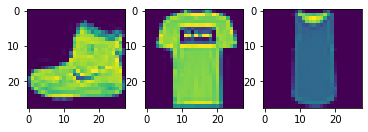

In [6]:
plt.subplot(131)
plt.imshow(X_train[0])
plt.subplot(132)
plt.imshow(X_train[1])
plt.subplot(133)
plt.imshow(X_train[2])

In [7]:
y_train[0]

9

|#|category|
|:---:|:---:|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [8]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [9]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)


In [10]:
print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

60000 10000 10000


In [11]:
model = models.Sequential()

model.add(layers.Conv2D(64, (2,2), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(2,2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation='softmax')) 

model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [12]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.5321 - acc: 0.8192 - val_loss: 0.3034 - val_acc: 0.8833

Epoch 00001: val_loss improved from inf to 0.30344, saving model to model.weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.3353 - acc: 0.8839 - val_loss: 0.2272 - val_acc: 0.9149

Epoch 00002: val_loss improved from 0.30344 to 0.22725, saving model to model.weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.2782 - acc: 0.9027 - val_loss: 0.1667 - val_acc: 0.9378

Epoch 00003: val_loss improved from 0.22725 to 0.16670, saving model to model.weights.best.hdf5
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2460 - acc: 0.9125 - val_loss: 0.1530 - val_acc: 0.9440

Epoch 00004: val_loss improved from 0.16670 to 0.15298, saving model to model.weights.best.hdf5
Epoch 5/10
600

In [13]:
test_loss, test_acc = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 290us/step


In [14]:
score = model.evaluate(X_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9186999797821045


MLP는 여러 문제를 풀기에 좋지만 영상이나 이미지를 처리하는데 문제가 있다.
이미지 인식과 같은 분야에서 MLP를 사용하게 되면 MLP는 모든 입력이 위치와 상관없이 동일한 수준의 중요도를 갖는다고 보기 때문에 MLP를 이용해 fully-connected neural network를 구성하게 되면 파라미터의 크기가 엄청나게 커진다. 

반면에 CNN은 데이터의 특징을 추출하여 특징들의 패턴을 파악하는 구조이며  Convolution 과정과 Pooling 과정을 통해 진행되기에 CNN을 사용하게 된다면 파라미터의 크기를 MLP와 비교하여 엄청나게 줄일 수 있으며 이미지 전체에서 대표할 수 있는 불변하는 특징을 얻을 수 있기 때문에 이 특징을 학습시켜서 높은 인식 능력을 갖을 수 있다.

위의 데이터의 결과로 볼 수 있듯이 MLP는 정확도가 86% 정도인 것에 반해 CNN으로 분류하였을 때는 90%가 넘는 정확도를 보여준다.

In [ ]:
감점요소는 아니지만 partial_X_train 을 학습시켜야 하지 않나요